#Dataset

In [ ]:


import requests
import json

url = "https://raw.githubusercontent.com/benedekrozemberczki/pytorch_geometric_temporal/refs/heads/master/dataset/montevideo_bus.json"
response = requests.get(url)
data = json.loads(response.text)

# Now you can work with the 'data' dictionary, which contains the JSON data.
# Example: print the keys of the JSON data.
print(data.keys())


dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])


In [ ]:
import pandas as pd

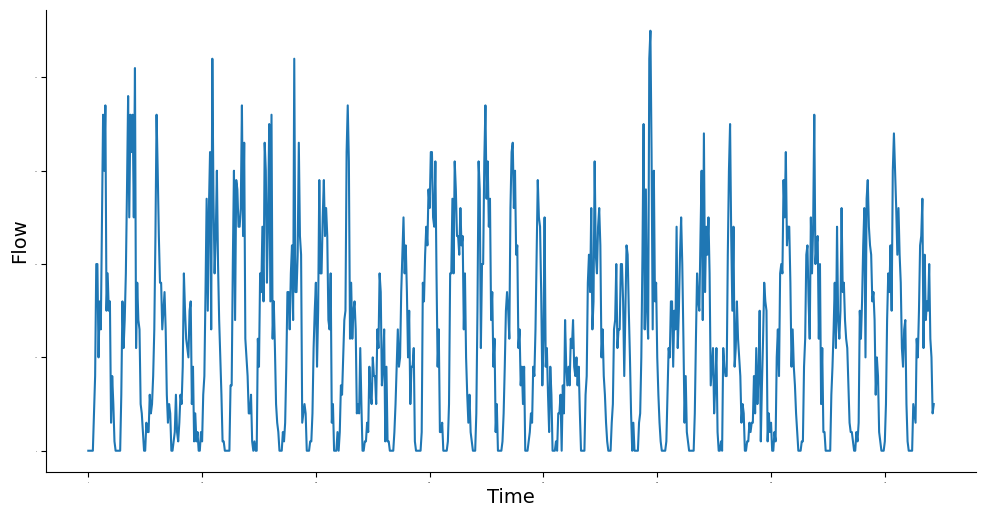

In [ ]:


# Find the index of the node with 'bus_stop' 1192
node_index = -1
for i, node in enumerate(data['nodes']):
  if node.get('bus_stop') == 1192:
    node_index = i
    break
if node_index != -1:
  # Extract the flow data for the specified node
  flow_data = data['nodes'][node_index]['y']
  # Create a time series DataFrame
  df = pd.DataFrame({'Time': range(len(flow_data)), 'Flow': flow_data})
  # Plot the flow over time using Seaborn
  plt.figure(figsize=(12, 6))
  ax = sns.lineplot(x='Time', y='Flow', data=df)
  # box surrounding the graph
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  # Set larger font size for labels and tick values
  ax.set_xlabel('Time', fontsize=14)
  ax.set_ylabel('Flow', fontsize=14)
  ax.tick_params(axis='both', which='major', labelsize=1)
  plt.show()
else:
  print("Bus stop 1192 not found in the data.")

# Nodes

In [ ]:


import requests
import json
import networkx as nx

url = "https://raw.githubusercontent.com/benedekrozemberczki/pytorch_geometric_temporal/refs/heads/master/dataset/montevideo_bus.json"
response = requests.get(url)
data = json.loads(response.text)

# Create a graph
graph = nx.Graph()

# Access the 'bus_stop' data within 'nodes' and add it as nodes to the graph
for node in data['nodes']:  # Iterate through the 'nodes' list
    bus_stop = node.get('bus_stop')  # Get the 'bus_stop' value from each node
    if bus_stop:
        graph.add_node(bus_stop)

# Show the nodes in the graph
graph.nodes


In [ ]:
print(graph.number_of_nodes())

675


# Edges

In [ ]:


import networkx as nx

# Assuming 'data' and 'graph' are already defined from the previous code

# Add edges to the graph based on 'links' data
for link in data['links']:
    source = link.get('source')
    target = link.get('target')
    if source is not None and target is not None:
        graph.add_edge(source, target)

# Show the edges in the graph
edges = list(graph.edges)
print("Edges in the graph:")
print(edges)
print("Number of edges:", len(edges))


Edges in the graph:
[(5289, 5290), (5290, 5291), (5291, 5292), (5292, 5293), (5293, 2510), (2510, 2511), (2511, 2512), (2512, 2513), (2513, 2514), (2514, 2515), (2515, 2516), (2516, 2518), (2518, 5199), (5199, 2519), (2519, 2520), (2520, 2521), (2521, 2522), (2522, 2523), (2523, 2524), (2524, 2022), (2022, 2023), (2023, 2525), (2525, 2526), (2526, 2527), (2527, 2528), (2528, 2529), (2529, 2530), (2530, 2531), (2531, 2532), (2532, 2533), (2533, 2534), (2534, 2535), (2535, 2536), (2536, 2537), (2537, 2538), (2538, 2540), (2538, 2619), (2540, 2541), (2541, 2542), (2542, 2543), (2543, 2544), (2544, 3209), (2544, 6197), (3209, 2546), (2546, 2547), (2546, 6197), (2546, 6194), (2547, 2548), (2547, 3215), (2548, 3215), (3215, 3216), (3216, 2549), (3216, 3525), (2549, 3217), (3217, 3219), (3219, 3221), (3221, 3223), (3223, 3225), (3225, 3227), (3227, 3228), (3228, 3230), (3230, 3231), (3231, 3232), (3232, 3233), (3233, 4207), (4207, 3241), (3241, 4908), (4908, 4010), (4010, 4012), (4012, 3912),

# Mapa

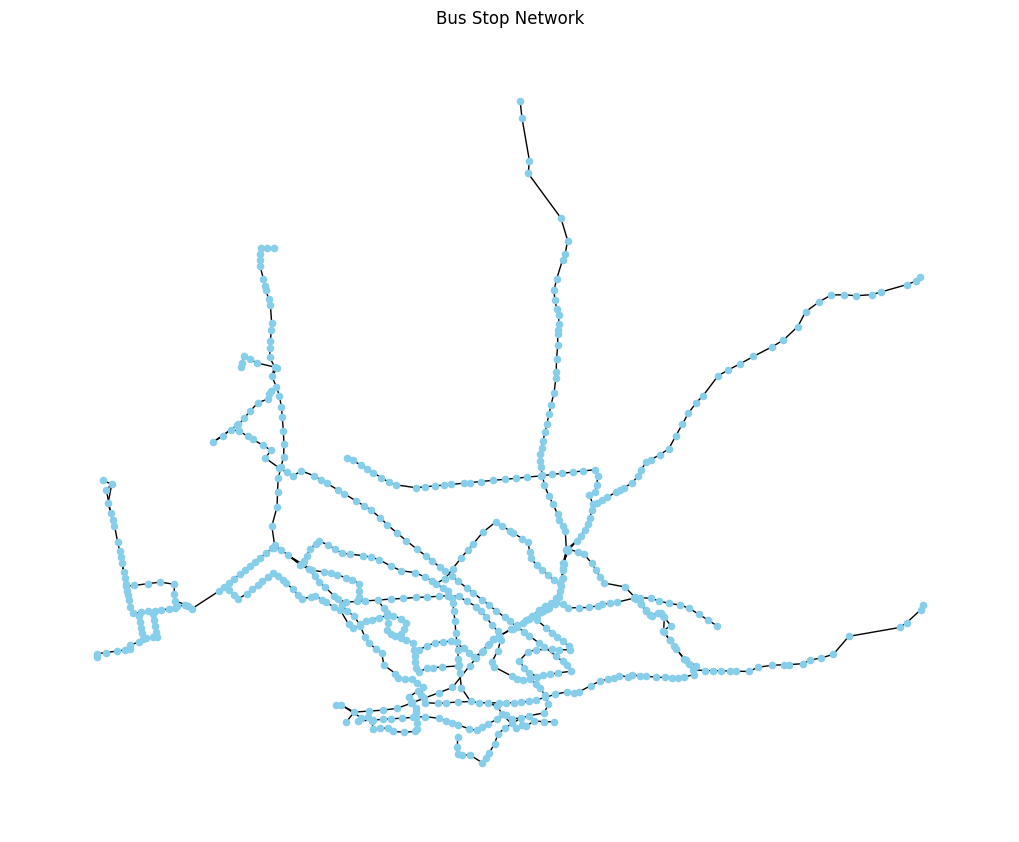

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'data' and 'graph' are already defined from the previous code

# Extract node positions (longitude and latitude)
node_positions = {}
for node_data in data['nodes']:
    node_id = node_data.get('bus_stop')  # Assuming 'bus_stop' is the node ID
    longitude = node_data.get('lon')
    latitude = node_data.get('lat')
    if node_id and longitude and latitude:
        node_positions[node_id] = (longitude, latitude)

# Create the graph plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Draw nodes with positions
nx.draw(graph, pos=node_positions, with_labels=False, node_size=20, node_color="skyblue")

# Customize the plot (optional)
plt.title("Bus Stop Network")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Static closeness centrality




In [ ]:


# Compute closeness centrality. By default, it is normalized by the number of nodes minus 1.
closeness_centrality = nx.closeness_centrality(graph)

print("Is closeness centrality normalized by default in networkx? Yes, by n-1.")

# Sort nodes by closeness centrality in descending order and get the top 10
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_closeness = sorted_closeness[:10]

print("\nTop 10 nodes with the highest closeness centrality:")
for node, centrality in top_10_closeness:
    print(f"Node {node}: {centrality:.6f}")

Is closeness centrality normalized by default in networkx? Yes, by n-1.

Top 10 nodes with the highest closeness centrality:
Node 2969: 0.028156
Node 2970: 0.028056
Node 3890: 0.027964
Node 4003: 0.027836
Node 2110: 0.027826
Node 3980: 0.027770
Node 3981: 0.027582
Node 4087: 0.027548
Node 2108: 0.027515
Node 3983: 0.027402


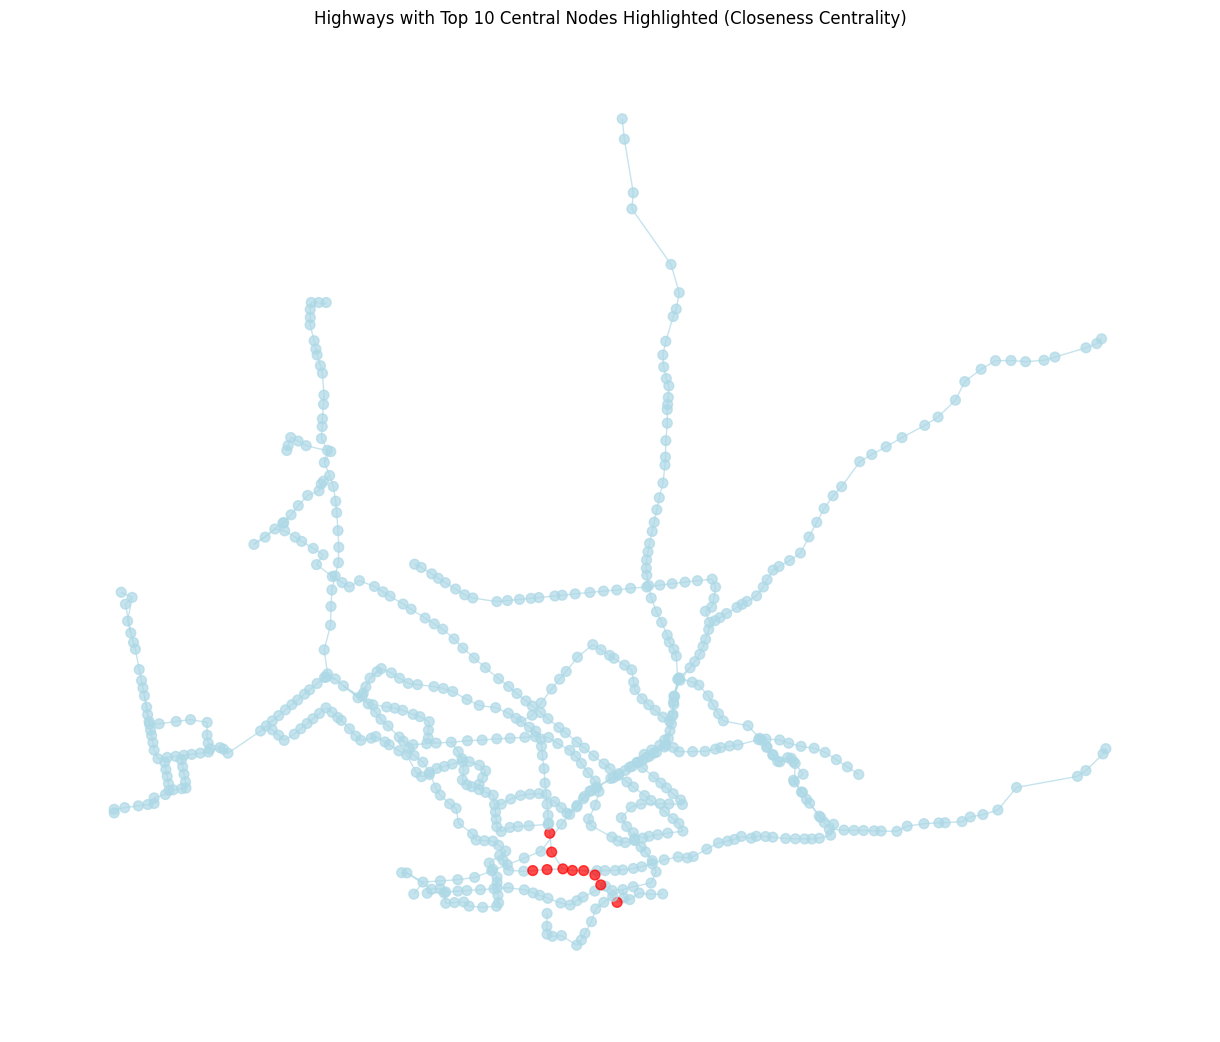

In [ ]:


# Get the node IDs for the top 10 nodes
top_10_node_ids = [node for node, centrality in top_10_closeness]

# Define node colors: red for top 10 nodes, lightblue otherwise
node_colors = []
for node in graph.nodes():
    if node in top_10_node_ids:
        node_colors.append('red')
    else:
        node_colors.append('lightblue')

# Plot the graph with highlighted nodes
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors, alpha=0.7, edge_color='lightblue')
plt.title("Highways with Top 10 Central Nodes Highlighted (Closeness Centrality)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Weights Road Distance

In [ ]:


import networkx as nx

# Assuming 'data' and 'graph' are already defined from the previous code

# Add edges with weights from 'links' data
for link in data['links']:
    source = link.get('source')
    target = link.get('target')
    weight = link.get('weight')  # Get the weight from the link
    if source is not None and target is not None and weight is not None:
        graph.add_edge(source, target, weight=weight)

# Show the weights for each edge
for u, v, weight in graph.edges(data='weight'):
    print(f"Edge ({u}, {v}): Weight = {weight}")

# Show the dimensions of the weights
weights = [data['weight'] for u, v, data in graph.edges(data=True)]
print(f"Dimension of edge weights: {len(weights)}")



Edge (5289, 5290): Weight = 172.2
Edge (5290, 5291): Weight = 280.2
Edge (5291, 5292): Weight = 770.3
Edge (5292, 5293): Weight = 271.1
Edge (5293, 2510): Weight = 447.6
Edge (2510, 2511): Weight = 340.3
Edge (2511, 2512): Weight = 364.5
Edge (2512, 2513): Weight = 414.4
Edge (2513, 2514): Weight = 516.6
Edge (2514, 2515): Weight = 554.6
Edge (2515, 2516): Weight = 623.4
Edge (2516, 2518): Weight = 392.1
Edge (2518, 5199): Weight = 629.6
Edge (5199, 2519): Weight = 448.6
Edge (2519, 2520): Weight = 399.0
Edge (2520, 2521): Weight = 344.9
Edge (2521, 2522): Weight = 809.8
Edge (2522, 2523): Weight = 319.0
Edge (2523, 2524): Weight = 410.5
Edge (2524, 2022): Weight = 416.3
Edge (2022, 2023): Weight = 441.1
Edge (2023, 2525): Weight = 485.3
Edge (2525, 2526): Weight = 334.6
Edge (2526, 2527): Weight = 297.7
Edge (2527, 2528): Weight = 170.6
Edge (2528, 2529): Weight = 300.6
Edge (2529, 2530): Weight = 219.5
Edge (2530, 2531): Weight = 296.9
Edge (2531, 2532): Weight = 275.1
Edge (2532, 25

\begin{equation}
C_C^{w\alpha}(i) = \left[ \sum_j d^{w\alpha}(i, j) \right]^{-1}
\end{equation}


In [ ]:

# Create a weighted graph
weighted_graph = nx.Graph()

# Add nodes to the weighted graph using 'bus_stop' as node IDs
for node_data in data['nodes']:
    node_id = node_data.get('bus_stop')
    if node_id:
        weighted_graph.add_node(node_id)

# Add edges with weights from 'links' data
for link in data['links']:
    source = link.get('source')
    target = link.get('target')
    weight = link.get('weight')
    if source is not None and target is not None and weight is not None:
        # Add edge with the weight as an attribute
        weighted_graph.add_edge(source, target, weight=weight)
#Based on the preceding code and the NetworkX documentation for `nx.closeness_centrality`, the calculated `weighted_closeness_centrality` *is* normalized.
weighted_closeness_centrality = nx.closeness_centrality(weighted_graph, distance='weight')

# Print the weighted closeness centrality for each node
print("Weighted Closeness Centrality:")
for node, centrality in weighted_closeness_centrality.items():
    print(f"Node {node}: {centrality}")

Weighted Closeness Centrality:
Node 5289: 3.4445931820461896e-05
Node 5290: 3.4651163345460616e-05
Node 5291: 3.498937200421022e-05
Node 5292: 3.5951150494156296e-05
Node 5293: 3.630128120147631e-05
Node 2510: 3.6892726428205266e-05
Node 2511: 3.7354037505083025e-05
Node 2512: 3.7859573830168364e-05
Node 2513: 3.8449381400795174e-05
Node 2514: 3.9208535342125814e-05
Node 2515: 4.005497967905096e-05
Node 2516: 4.1048024519970456e-05
Node 2518: 4.169622133809323e-05
Node 5199: 4.277756127014549e-05
Node 2519: 4.358036717907719e-05
Node 2520: 4.431783337713721e-05
Node 2521: 4.4973647711141596e-05
Node 2522: 4.658726767762515e-05
Node 2523: 4.7253044512255796e-05
Node 2524: 4.8135490006111756e-05
Node 2022: 4.9061740794128477e-05
Node 2023: 5.0079592745024375e-05
Node 2525: 5.1245588659597577e-05
Node 2526: 5.207895398138272e-05
Node 2527: 5.284106865557735e-05
Node 2528: 5.3286507406472664e-05
Node 2529: 5.4087318036599876e-05
Node 2530: 5.468550076421773e-05
Node 2531: 5.551327129997059

# Static weighted closeness centrality

In [ ]:


# Sort the nodes by weighted closeness centrality in descending order
sorted_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 nodes
top_10_weighted_closeness = sorted_weighted_closeness[:10]

# Print the top 10 nodes with their weighted closeness centrality
print("\nTop 10 nodes with highest Weighted Closeness Centrality:")
for node, centrality in top_10_weighted_closeness:
    print(f"Node: {node}, Weighted Closeness Centrality: {centrality}")


Top 10 nodes with highest Weighted Closeness Centrality:
Node: 2969, Weighted Closeness Centrality: 9.094456591376079e-05
Node: 2970, Weighted Closeness Centrality: 9.074890819234559e-05
Node: 3890, Weighted Closeness Centrality: 9.053846570372697e-05
Node: 3980, Weighted Closeness Centrality: 8.997049261514458e-05
Node: 2108, Weighted Closeness Centrality: 8.946481220181115e-05
Node: 2110, Weighted Closeness Centrality: 8.945796424014778e-05
Node: 3981, Weighted Closeness Centrality: 8.938464388527946e-05
Node: 4003, Weighted Closeness Centrality: 8.935714626154025e-05
Node: 3828, Weighted Closeness Centrality: 8.890422977833728e-05
Node: 3891, Weighted Closeness Centrality: 8.841107497989792e-05


In [ ]:


print("\nTop 10 nodes with highest Weighted Closeness Centrality:")
for node, centrality in top_10_weighted_closeness:
  print(f"Node: {node}, Weighted Closeness Centrality: {centrality:.6f}")


Top 10 nodes with highest Weighted Closeness Centrality:
Node: 2969, Weighted Closeness Centrality: 0.000091
Node: 2970, Weighted Closeness Centrality: 0.000091
Node: 3890, Weighted Closeness Centrality: 0.000091
Node: 3980, Weighted Closeness Centrality: 0.000090
Node: 2108, Weighted Closeness Centrality: 0.000089
Node: 2110, Weighted Closeness Centrality: 0.000089
Node: 3981, Weighted Closeness Centrality: 0.000089
Node: 4003, Weighted Closeness Centrality: 0.000089
Node: 3828, Weighted Closeness Centrality: 0.000089
Node: 3891, Weighted Closeness Centrality: 0.000088


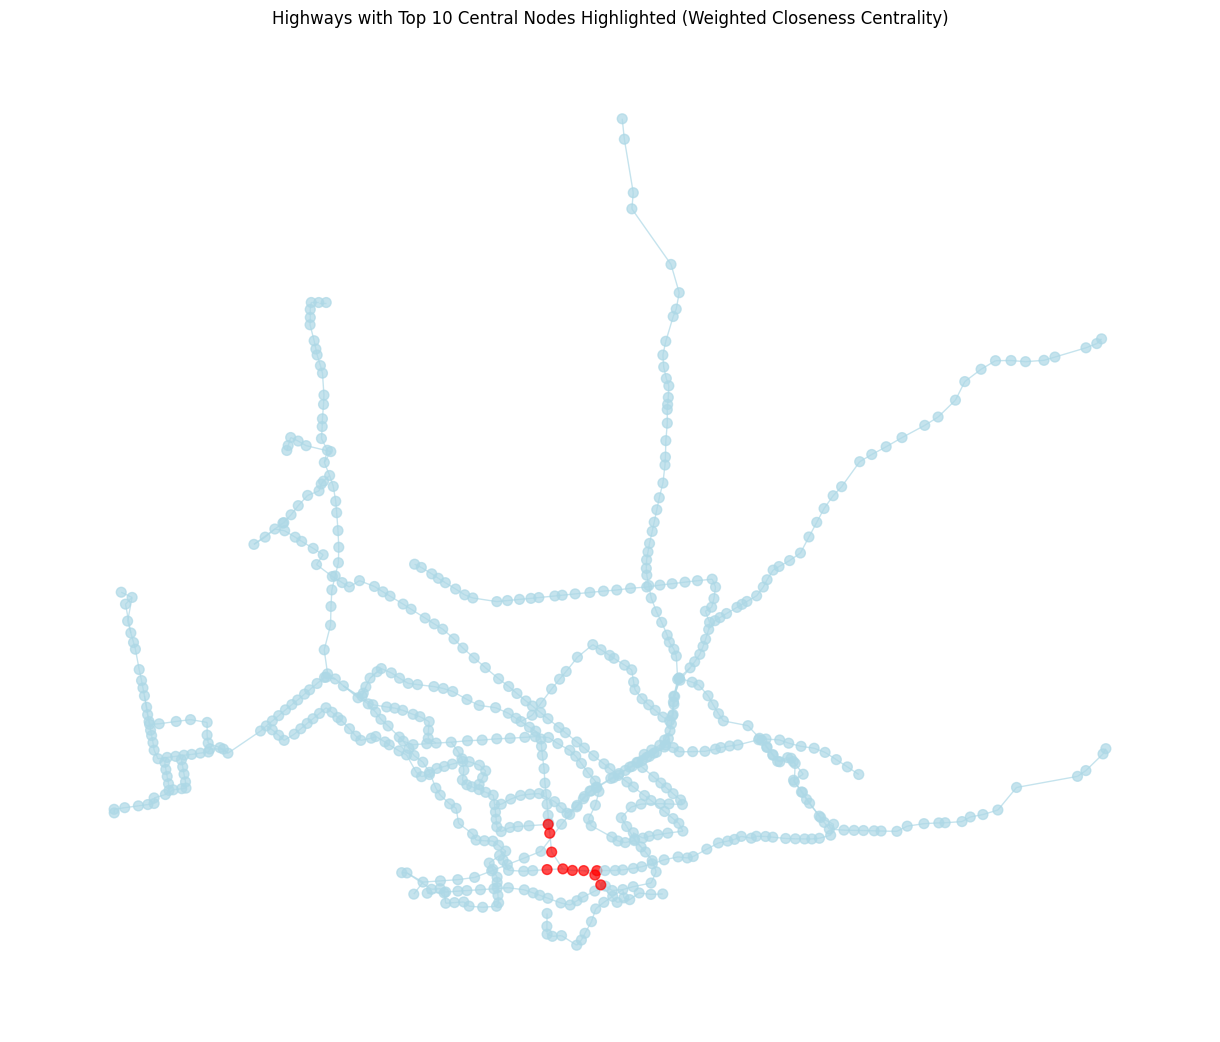

In [ ]:
# Get the node IDs for the top 10 nodes with weighted closeness centrality
top_10_closeness_node_weight = [node for node, centrality in top_10_weighted_closeness]

# Define node colors: red for top 10 nodes, lightblue otherwise
node_colors_closeness = []
for node in graph.nodes():
    if node in top_10_closeness_node_weight:
        node_colors_closeness.append('red')
    else:
        node_colors_closeness.append('lightblue')

# Plot the graph with highlighted nodes based on weighted closeness centrality
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors_closeness, alpha=0.7, edge_color='lightblue')
plt.title("Highways with Top 10 Central Nodes Highlighted (Weighted Closeness Centrality)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

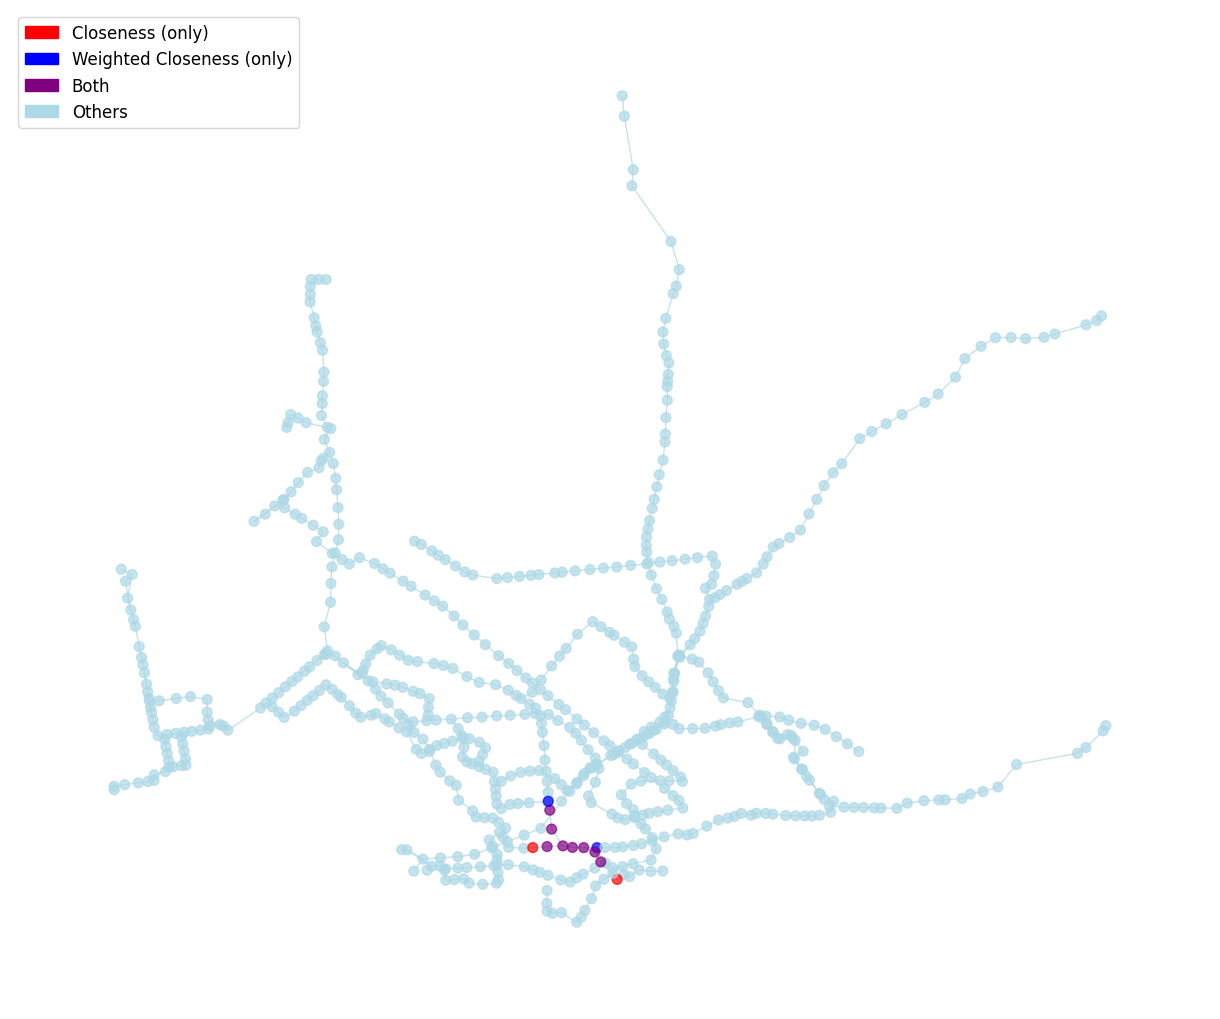

In [ ]:


# Extract node IDs for top 10 closeness and top 10 weighted closeness
top_10_closeness_ids = [node for node, centrality in top_10_closeness]
top_10_weighted_closeness_ids = [node for node, centrality in top_10_weighted_closeness]

# Create lists to hold node colors
node_colors_combined = []
for node in graph.nodes():
    if node in top_10_closeness_ids and node in top_10_weighted_closeness_ids:
        node_colors_combined.append('purple') # Nodes in both top 10s
    elif node in top_10_closeness_ids:
        node_colors_combined.append('red') # Nodes only in top 10 closeness
    elif node in top_10_weighted_closeness_ids:
        node_colors_combined.append('blue') # Nodes only in top 10 weighted closeness
    else:
        node_colors_combined.append('lightblue') # Other nodes

# Plot the graph
plt.figure(figsize=(12, 10))
nx.draw(
    graph,
    pos=node_positions,
    with_labels=False,
    node_size=50,
    node_color=node_colors_combined,
    alpha=0.7,
    edge_color='lightblue'
)

# Create a legend manually with larger font size
red_patch = mpatches.Patch(color='red', label='Closeness')
blue_patch = mpatches.Patch(color='blue', label='Weighted Closeness')
purple_patch = mpatches.Patch(color='purple', label='Both')
lightblue_patch = mpatches.Patch(color='lightblue', label='Others')
plt.legend(handles=[red_patch, blue_patch, purple_patch, lightblue_patch], loc='upper left', fontsize='large') # Increased fontsize here

#plt.title("Bus Stop Network with Top 10 Central Nodes Highlighted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



Top 10 nodes with the highest degree centrality:
Node 2546: 0.005935
Node 1568: 0.005935
Node 1569: 0.005935
Node 4193: 0.005935
Node 998: 0.005935
Node 4322: 0.005935
Node 2538: 0.004451
Node 2544: 0.004451
Node 2547: 0.004451
Node 3215: 0.004451


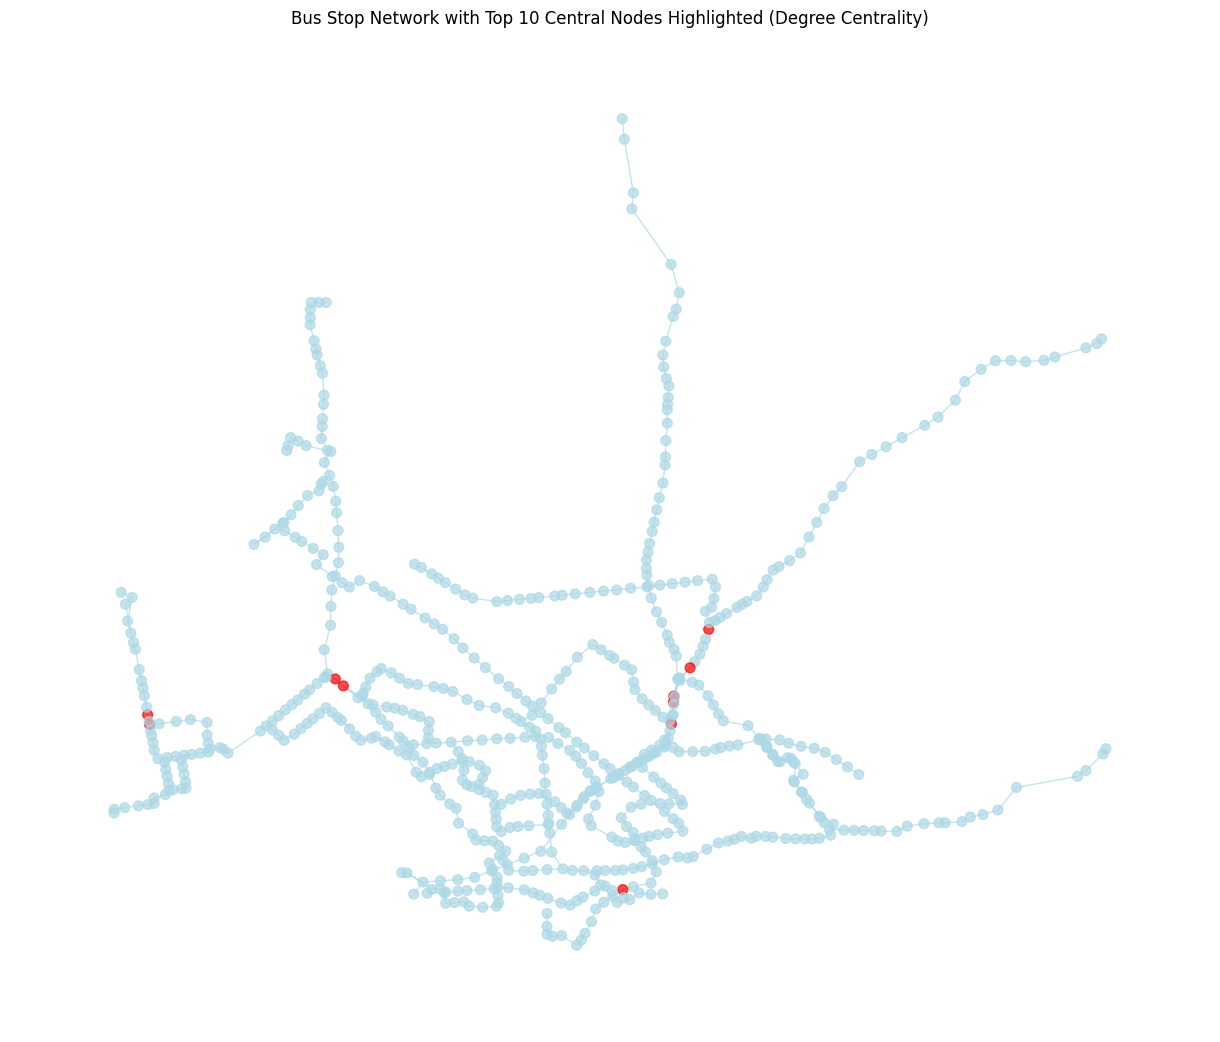

In [ ]:


# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)

# Sort nodes by degree centrality in descending order and get the top 10
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_degree = sorted_degree[:10]

print("\nTop 10 nodes with the highest degree centrality:")
for node, centrality in top_10_degree:
    print(f"Node {node}: {centrality:.6f}")

# Get the node IDs for the top 10 nodes
top_10_node_ids_degree = [node for node, centrality in top_10_degree]

# Define node colors: red for top 10 nodes, lightblue otherwise
node_colors_degree = []
for node in graph.nodes():
    if node in top_10_node_ids_degree:
        node_colors_degree.append('red')
    else:
        node_colors_degree.append('lightblue')

# Plot the graph with highlighted nodes based on degree centrality
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors_degree, alpha=0.7, edge_color='lightblue')
plt.title("Bus Stop Network with Top 10 Central Nodes Highlighted (Degree Centrality)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Top 10 nodes with the highest betweenness centrality:
Node 3464: 0.379779
Node 3465: 0.361038
Node 1568: 0.320800
Node 1569: 0.320323
Node 3463: 0.314496
Node 5643: 0.312922
Node 2187: 0.311352
Node 3885: 0.309783
Node 2186: 0.308213
Node 3216: 0.307904


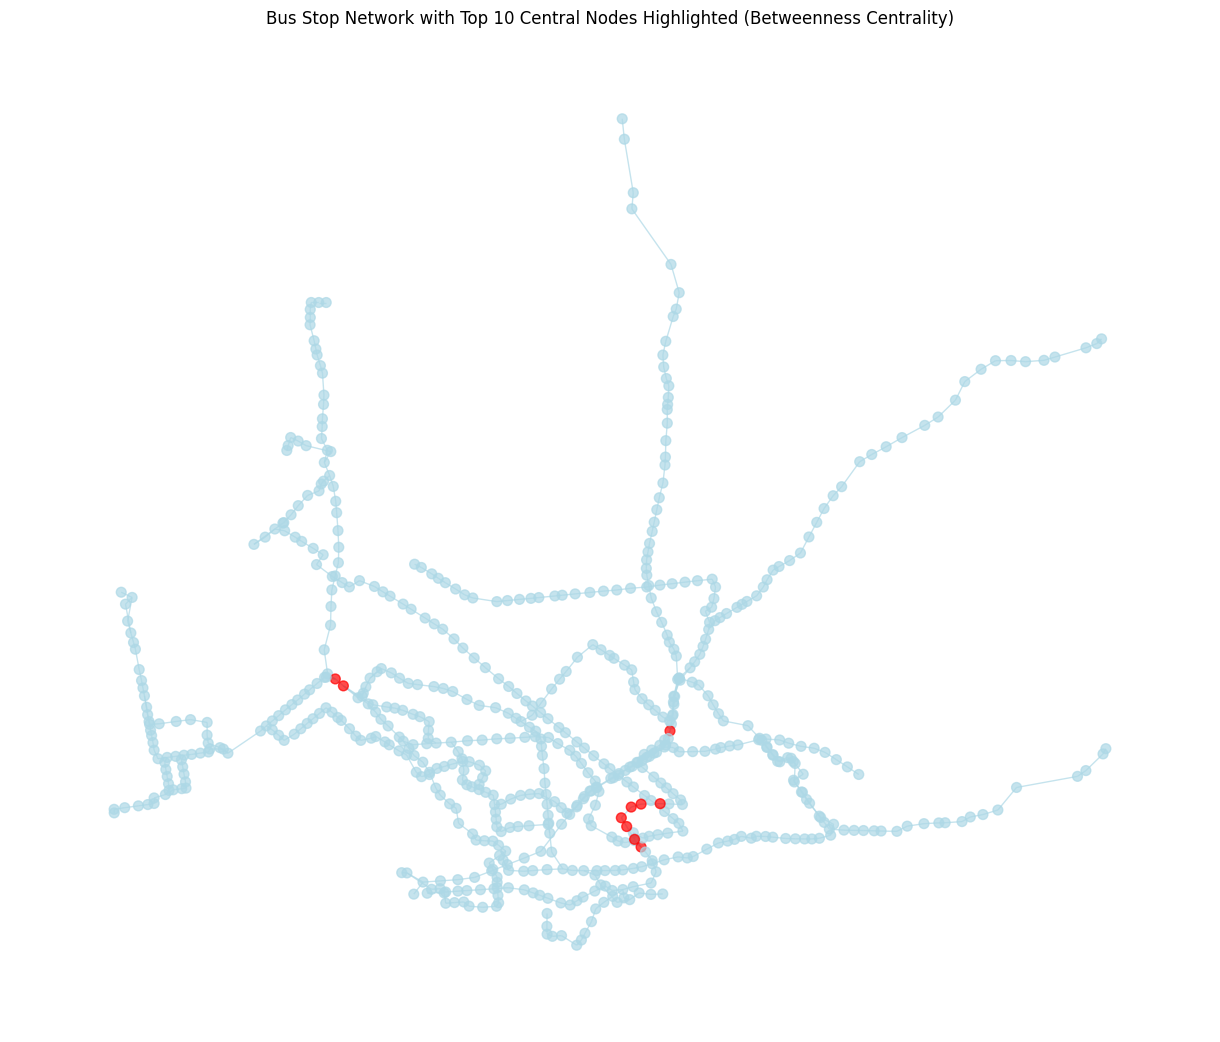

In [ ]:


# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Sort nodes by betweenness centrality in descending order and get the top 10
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_betweenness = sorted_betweenness[:10]

print("\nTop 10 nodes with the highest betweenness centrality:")
for node, centrality in top_10_betweenness:
    print(f"Node {node}: {centrality:.6f}")

# Get the node IDs for the top 10 nodes
top_10_node_ids_betweenness = [node for node, centrality in top_10_betweenness]

# Define node colors: red for top 10 nodes, lightblue otherwise
node_colors_betweenness = []
for node in graph.nodes():
    if node in top_10_node_ids_betweenness:
        node_colors_betweenness.append('red')
    else:
        node_colors_betweenness.append('lightblue')

# Plot the graph with highlighted nodes based on betweenness centrality
plt.figure(figsize=(12, 10))
nx.draw(graph, pos=node_positions, with_labels=False, node_size=50, node_color=node_colors_betweenness, alpha=0.7, edge_color='lightblue')
plt.title("Bus Stop Network with Top 10 Central Nodes Highlighted (Betweenness Centrality)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

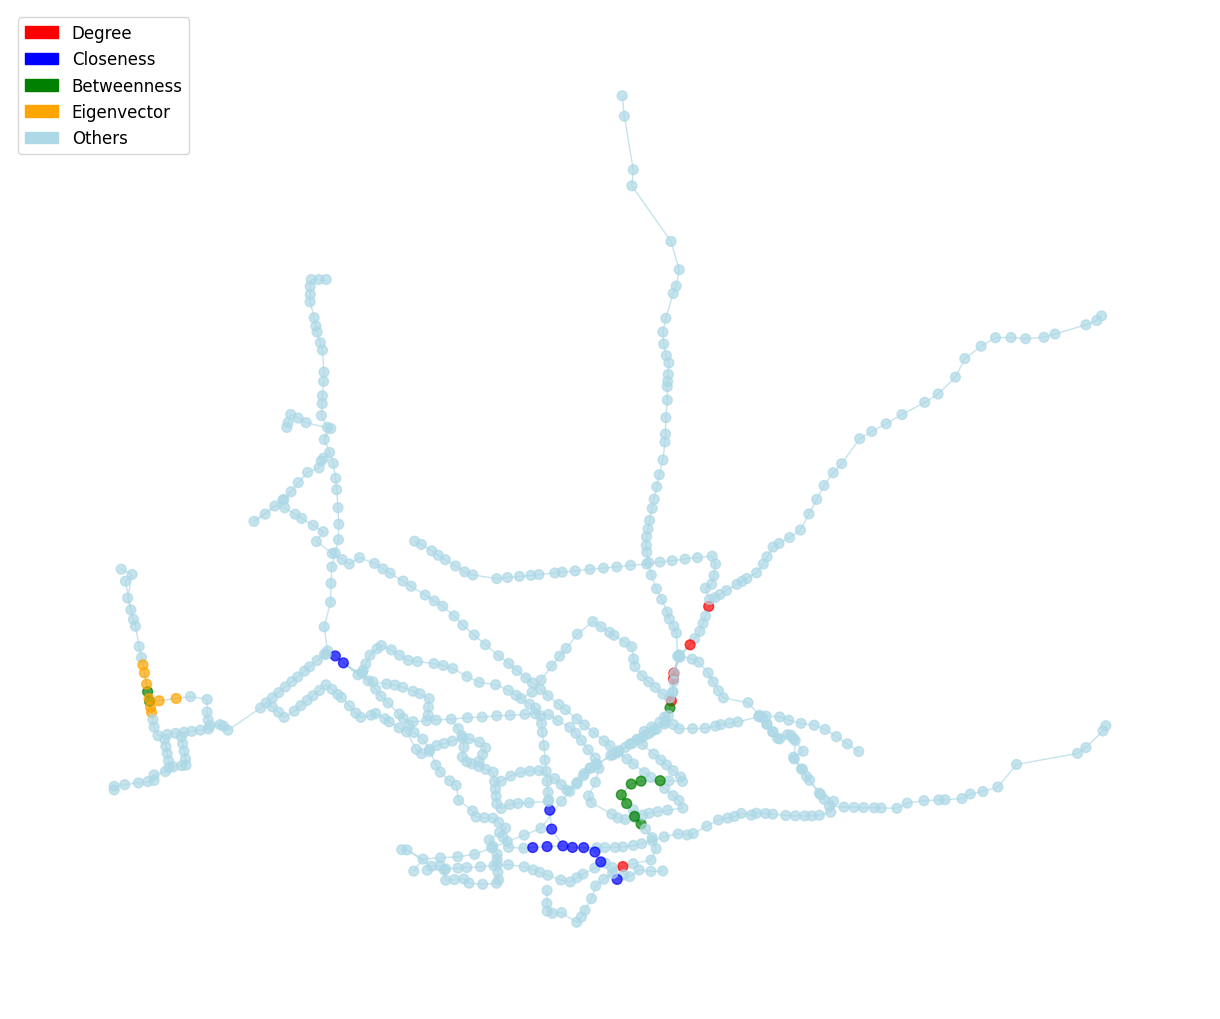

In [ ]:

import matplotlib.patches as mpatches

# Calculate all four centrality metrics
degree_centrality = nx.degree_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
# Increase max_iter and/or change tol to improve convergence
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=500, tol=1e-4)


# Store centrality values in dictionaries for easy lookup
centralities = {
    'degree': degree_centrality,
    'closeness': closeness_centrality,
    'betweenness': betweenness_centrality,
    'eigenvector': eigenvector_centrality
}

# Plot the graph with node colors based on which top 10 list they appear in
plt.figure(figsize=(12, 10))

# Create color mapping based on inclusion in top 10 for each centrality metric
node_colors_combined_all = []
top_10_degree_ids = [node for node, centrality in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]]
top_10_closeness_ids = [node for node, centrality in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]]
top_10_betweenness_ids = [node for node, centrality in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]]
top_10_eigenvector_ids = [node for node, centrality in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]]


for node in graph.nodes():
    in_degree = node in top_10_degree_ids
    in_closeness = node in top_10_closeness_ids
    in_betweenness = node in top_10_betweenness_ids
    in_eigenvector = node in top_10_eigenvector_ids

    if in_degree and in_closeness and in_betweenness and in_eigenvector:
        node_colors_combined_all.append('purple') # In all top 10s
    elif in_degree:
        node_colors_combined_all.append('red') # Only in top 10 degree
    elif in_closeness:
        node_colors_combined_all.append('blue') # Only in top 10 closeness
    elif in_betweenness:
        node_colors_combined_all.append('green') # Only in top 10 betweenness
    elif in_eigenvector:
        node_colors_combined_all.append('orange') # Only in top 10 eigenvector
    else:
        node_colors_combined_all.append('lightblue') # Other nodes


nx.draw(
    graph,
    pos=node_positions,
    with_labels=False,
    node_size=50,
    node_color=node_colors_combined_all,
    alpha=0.7,
    edge_color='lightblue'
)

# Create a legend manually for the combined plot
legend_patches = [
    mpatches.Patch(color='red', label='Degree'),
    mpatches.Patch(color='blue', label='Closeness'),
    mpatches.Patch(color='green', label='Betweenness'),
    mpatches.Patch(color='orange', label='Eigenvector'),
    mpatches.Patch(color='lightblue', label='Others')
]
plt.legend(handles=legend_patches, loc='upper left', fontsize='large')

#plt.title("Bus Stop Network with Top 10 Central Nodes Highlighted (All Centrality Metrics)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()